In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from sklearn.datasets import load_iris, load_diabetes
import numpy as np

In [53]:
data = pd.read_csv('data/penguins.csv')

In [75]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.00000,3750.000000,0
1,39.50000,17.40000,186.00000,3800.000000,1
2,40.30000,18.00000,195.00000,3250.000000,1
3,43.92193,17.15117,214.01462,4201.754386,0
4,36.70000,19.30000,193.00000,3450.000000,1


In [77]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,214.014620,4201.754386,0.479651
std,5.443643,1.969027,259.797302,799.613058,0.500313
min,32.100000,13.100000,-132.000000,2700.000000,0.000000
25%,39.275000,15.600000,190.000000,3550.000000,0.000000
50%,44.250000,17.300000,197.000000,4050.000000,0.000000
75%,48.500000,18.700000,214.000000,4750.000000,1.000000
max,59.600000,21.500000,5000.000000,6300.000000,1.000000


In [55]:
data.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [56]:
data.sex.value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [57]:
data.sex = data.sex.replace('.', None)

In [58]:
data.isnull().sum()

culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [59]:
data.sex = data.sex.fillna(data['sex'].mode()[0])

In [60]:
numerical_cols = data.select_dtypes(include=['float']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [61]:
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10000,18.70000,181.00000,3750.000000,MALE
1,39.50000,17.40000,186.00000,3800.000000,FEMALE
2,40.30000,18.00000,195.00000,3250.000000,FEMALE
3,43.92193,17.15117,214.01462,4201.754386,MALE
4,36.70000,19.30000,193.00000,3450.000000,FEMALE


In [62]:
data.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [63]:
data['sex'] = data['sex'].map( {
        'MALE' : 0,
        'FEMALE' : 1
     })

In [64]:
x = data.copy()
x[numerical_cols] = StandardScaler().fit_transform(x[numerical_cols])

In [65]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-8.870812e-01,7.877425e-01,-0.127263,-0.565789,0
1,-8.134940e-01,1.265563e-01,-0.107990,-0.503168,1
2,-6.663195e-01,4.317192e-01,-0.073297,-1.192003,1
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,0
4,-1.328605e+00,1.092905e+00,-0.081006,-0.941517,1


In [68]:
from sklearn.metrics import silhouette_score

k_range = range(1, 11)
inertia = list()
scores = list()
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init=10)
    labels = kmeans.fit_predict(x)
    inertia.append(kmeans.inertia_)
    if k !=1:
        scores.append(silhouette_score(x, labels))
    

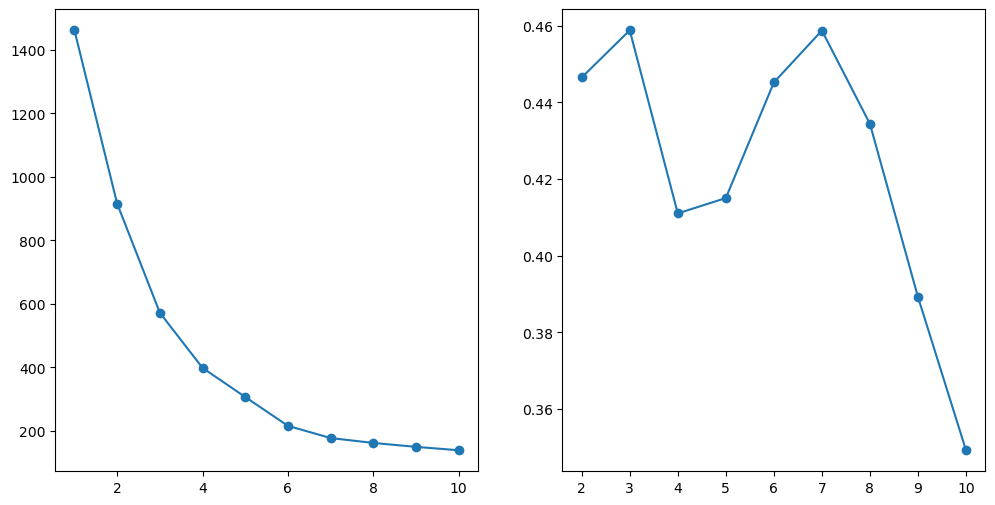

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(k_range, inertia, marker='o')
axes[1].plot(k_range[1:], scores, marker='o')

In [71]:
for k, silhouette in enumerate(scores):
    print(f'silhouette for k={k+1} is : {silhouette}')

silhouette for k=1 is : 0.4464942820619684
silhouette for k=2 is : 0.45881474015449225
silhouette for k=3 is : 0.41103730776282926
silhouette for k=4 is : 0.4150383497128186
silhouette for k=5 is : 0.4452042450009802
silhouette for k=6 is : 0.45874106745588317
silhouette for k=7 is : 0.43440528814750917
silhouette for k=8 is : 0.38922933560524575
silhouette for k=9 is : 0.34922829774793834


In [78]:
kmeans = KMeans(n_clusters = 2, n_init=10)
labels = kmeans.fit_predict(x)

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.90)
x_pca = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.44629762, 0.24180432, 0.20031003, 0.09151299])

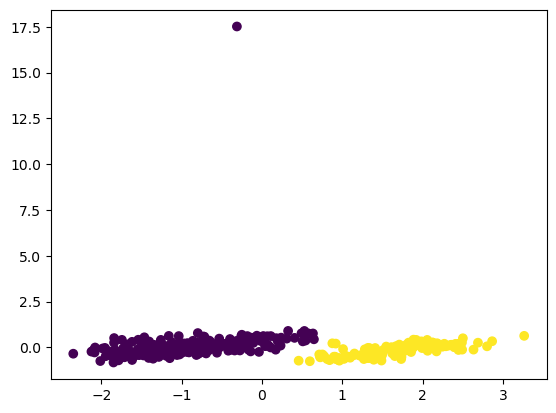

In [80]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)

In [137]:
dbscan = DBSCAN(eps=0.8, min_samples=3)
labels = dbscan.fit_predict(x)

In [90]:
silhouette_score(x, labels)

np.float64(0.3678221456618001)

In [93]:
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = np.arange(3, 15, 1)

In [110]:
scores = list()

for eps in eps_values:
    for min_samples in min_samples_values:
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(x)
        
        mask = labels!=-1
        noise = labels[~mask]

        noise_pts = len(noise)
        noise_ratio = 0
        if len(labels)>0:
            noise_ratio = noise_pts/len(labels)
            
        labels = labels[mask]
        n_cluster = len(set(labels))
       
        
        if len(labels) > 1 and n_cluster >1:
            scores.append(
                {
                    'eps': eps,
                    'min_samples' : min_samples,
                    'n_clusters' : n_cluster,
                    'noise_points' : noise_pts,
                    'noise_ratio' : noise_ratio,
                    'silhouette_score' : silhouette_score(x[mask], labels)
                }
            )

In [114]:
pd.DataFrame(scores).sort_values(["noise_ratio"], ascending=True)

,eps,min_samples,n_clusters,noise_points,noise_ratio,silhouette_score
76,0.9,7,4,4,0.011628,0.380350
77,0.9,8,4,4,0.011628,0.380350
72,0.9,3,3,4,0.011628,0.236763
73,0.9,4,3,4,0.011628,0.236763
74,0.9,5,3,4,0.011628,0.236763
...,...,...,...,...,...,...
9,0.3,8,4,284,0.825581,0.778665
10,0.3,9,3,296,0.860465,0.809670
11,0.3,10,3,304,0.883721,0.816220
3,0.2,5,3,324,0.941860,0.888662


In [138]:
from sklearn.manifold import TSNE


tsne = TSNE(
    n_components=2,   
    perplexity=10,      
    max_iter=1000,       
    learning_rate=200,  
    random_state=42,    
    init='pca'          
)
x_tsne = tsne.fit_transform(x)

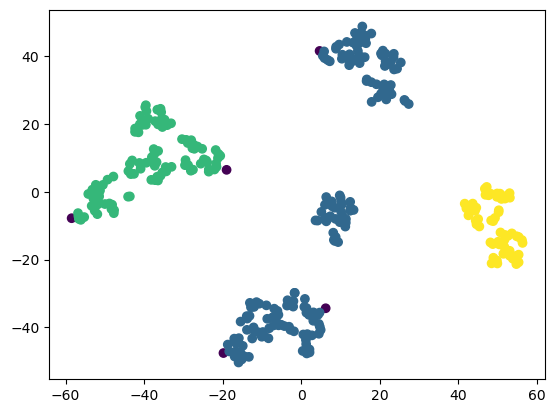

In [139]:
plt.scatter(
        x_tsne[:, 0],
        x_tsne[:, 1],
    c = labels
    )

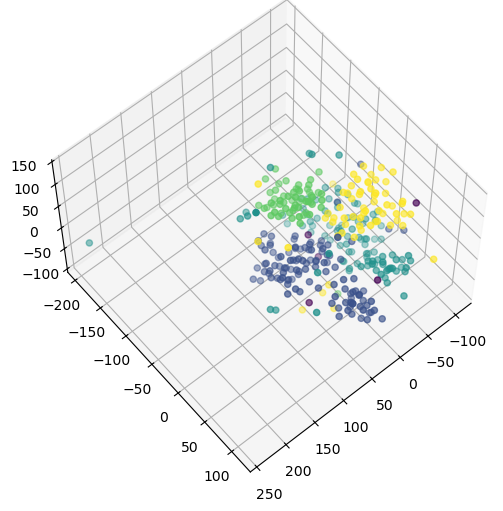

In [130]:

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_tsne[:, 0], x_tsne[:, 1], x_tsne[:, 2], c=labels)
ax.view_init(elev = 60, azim = 50)

In [115]:
def get_overall_best(results):
    best = max(results, key=lambda x: x['silhouette_score'])
    return {
        "eps": float(best["eps"]),
        "min_samples": int(best["min_samples"]),
        "n_clusters": int(best["n_clusters"]),
        "silhouette_score": float(best["silhouette_score"])
    }

In [113]:
get_overall_best(scores)

{'eps': 0.1,
 'min_samples': 3,
 'n_clusters': 2,
 'silhouette_score': 0.9724811492309983}

In [51]:
pd.DataFrame(scores)

,eps,min_samples,n_clusters,silhouette_score
0,0.1,3,2,0.972481
1,0.2,3,18,0.522393
2,0.2,4,15,0.552742
3,0.2,5,3,0.888662
4,0.3,3,19,0.270202
5,0.3,4,12,0.383227
6,0.3,5,12,0.382348
7,0.3,6,10,0.457819
8,0.3,7,11,0.470266
9,0.3,8,4,0.778665
